In [47]:
import pandas as pd
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

In [48]:
dtst=pd.read_csv("C:/Users/PARCHU/Downloads/concrete_data.csv")

In [49]:
dtst

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [50]:
dtst.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [51]:
def norm(i):
    x=(i-i.mean())/(i.std())
    return(x)

In [52]:
dt=norm(dtst.iloc[:,0:9])
dt

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597,2.644123
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597,1.560663
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340,0.266498
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221,0.313188
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069,0.507732
...,...,...,...,...,...,...,...,...,...
1025,-0.045623,0.487998,0.564271,-0.092126,0.451190,-1.322363,-0.065861,-0.279597,0.506535
1026,0.392628,-0.856472,0.959602,0.675872,0.702285,-1.993711,0.496651,-0.279597,-0.277627
1027,-1.269472,0.759210,0.850222,0.521336,-0.017520,-1.035561,0.080068,-0.279597,-0.725377
1028,-1.168042,1.307430,-0.846733,-0.279443,0.852942,0.214537,0.191074,-0.279597,-0.182450


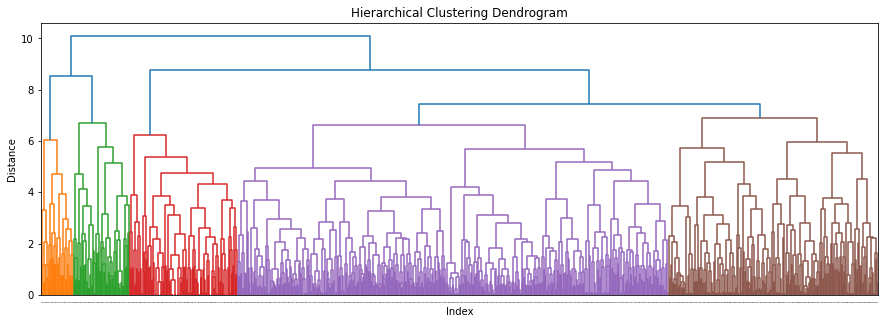

In [53]:
z=linkage(dt,method='complete',metric='euclidean')
plt.figure(figsize=(15, 5));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(
    z,
    leaf_rotation=0.,  
    leaf_font_size=.8,
)
plt.show()

In [54]:
c=AgglomerativeClustering(n_clusters=5,linkage='complete',affinity='euclidean').fit(dt)


In [55]:
c.labels_

array([1, 1, 3, ..., 4, 4, 0], dtype=int64)

In [56]:
cluster_labels=pd.Series(c.labels_)
dtst['cluster']=cluster_labels
dtst=dtst.iloc[:,[9,0,1,2,3,4,5,6,7,8]]
dtst

,cluster,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,1,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,3,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...,...
1025,0,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,0,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,4,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,4,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [57]:
dtst.groupby(dtst.cluster).mean()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
cluster,,,,,,,,,
0,293.653101,88.619380,75.519380,191.547287,6.506589,923.099225,732.537597,29.918605,35.844070
1,419.091304,66.244928,14.079710,173.471014,5.973913,1068.733333,672.820290,54.188406,55.813623
2,385.772180,135.481955,1.984962,161.358647,13.345865,900.144361,815.121053,33.631579,55.093083
3,318.617500,79.082500,0.000000,219.300000,0.000000,945.510000,681.760000,294.250000,44.428500
4,228.057925,51.878491,66.216038,179.986604,4.763962,1005.027736,803.183208,36.473585,27.715226
